In [1]:
//---- imports for HIPO4 library
import org.jlab.jnp.hipo4.io.*;
import org.jlab.jnp.hipo4.data.*;
//---- imports for GROOT library
import org.jlab.groot.data.*;
import org.jlab.groot.graphics.*;
//---- imports for PHYSICS library
import org.jlab.jnp.physics.*;
import org.jlab.jnp.reader.*;


HipoReader reader = new HipoReader(); // Create a reader obejct
reader.open("/home/justind/DATA/out_6489_v9_1xx.hipo"); // open a file

reader:: *****>>>>> openning file : /home/justind/DATA/out_6489_v9_1xx.hipo
reader:: ***** dictionary entries :            7
reader:: ************ file size   :   7046096244
reader:: **** scan trailer #bytes :        43192
reader:: ***** number of  records :         1349
reader:: ***** number of  events  :      6935866


In [2]:
/**
   * @param fromBank the bank containing the index variable
   * @param idxVarName the name of the index variable
   * @return map with keys being the index in toBank and values the indices in fromBank
   */
  public static Map<Integer,List<Integer>> loadMapByIndex(
           Bank fromBank,
           String idxVarName) {
            
       Map<Integer,List<Integer>> map=new HashMap<Integer,List<Integer>>();
       if (fromBank!=null) {

           for (int iFrom=0; iFrom<fromBank.getRows(); iFrom++) {
               final int iTo = fromBank.getInt(idxVarName,iFrom);
               if (!map.containsKey(iTo)) map.put(iTo,new ArrayList<Integer>());
               map.get(iTo).add(iFrom);
           }
       }
       return map;
   }

In [3]:
public class DvcsEvent {
    double MNUC=1.878;
    LorentzVector  vBeam   = new LorentzVector(0.0,0.0,10.2,10.2);
    LorentzVector  vTarget = new LorentzVector(0.0,0.0,0.0,this.MNUC);
    LorentzVector  velectron = new LorentzVector();
    LorentzVector  vphoton = new LorentzVector();
    LorentzVector  vhadron = new LorentzVector();
    double beta;

    
    public DvcsEvent() {
      // This constructor no parameter.
      System.out.println("setting the default DVCS event for hadron :" + MNUC );
   }
    public DvcsEvent(double mass) {
      // This constructor no parameter.
      MNUC=mass;
      System.out.println("setting the default DVCS event for hadron :" + MNUC );
   }

   public void setElectron(Bank particles, int ne) {
      velectron.setPxPyPzM(particles.getFloat("px",ne),
                                 particles.getFloat("py",ne),
                                 particles.getFloat("pz",ne),
                                 0.0005);
   }

   public void setPhoton(Bank particles, int ng) {
      vphoton.setPxPyPzM( particles.getFloat("px",ng),
                                particles.getFloat("py",ng),
                                particles.getFloat("pz",ng),
                                0.0);
   }
   public void setHadron(Bank particles, int nh) {
      vhadron.setPxPyPzM(particles.getFloat("px",nh),
                                particles.getFloat("py",nh),
                                particles.getFloat("pz",nh),
                                this.MNUC);
   }
   public LorentzVector W(){
       LorentzVector tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget).sub(velectron);
       return tmp;
       
   }
   public LorentzVector Q(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.sub(velectron);
       return tmp;
       
   }
   public LorentzVector DVCSmissX(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget);
       tmp.sub(velectron);
       tmp.sub(vphoton);
       return tmp;
   }
   public LorentzVector ehehgX(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget);
       tmp.sub(velectron);
       tmp.sub(vphoton);
       tmp.sub(vhadron);
       return tmp;
   }
   public LorentzVector ehehX(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget);
       tmp.sub(velectron);
       tmp.sub(vhadron);
       return tmp;
   }
   public double MM2(){
       return this.DVCSmissX().mass2();
   }
   public double Mpx(){
       return this.ehehgX().px();
   }
   public double Mpy(){
       return this.ehehgX().py();
   }
   public double Mpz(){
       return this.ehehgX().pz();
   }
   public boolean DVCScut(){
       boolean cut=(-this.Q().mass2()>1 && this.W().mass()>2 && this.vphoton.e()>1);
       return cut;
   }
   public double Xb(){
       return (-this.Q().mass2())/(2*0.938*(this.vBeam.p()-this.velectron.p()));
   }
   public double DTheta(){
        LorentzVector tmp = new LorentzVector();
        tmp.copy(this.ehehX());
    return Math.toDegrees(vphoton.vect().angle(tmp.vect()));
   }
   public double DPhi(){
        LorentzVector temp = new LorentzVector();
        temp.copy(this.ehehX());
    return Math.toDegrees(temp.vect().phi() - vphoton.vect().phi());
   }
   public double PhiPlane(){
       double Phi;
       Vector3 leptonicPlane = new Vector3();
       Vector3 hadronicPlane = new Vector3();
       leptonicPlane.copy(vBeam.vect().cross(velectron.vect()));
       hadronicPlane.copy(vhadron.vect().cross(vphoton.vect()));
       Phi = Math.toDegrees(leptonicPlane.angle(hadronicPlane));
       return Phi;
   }
    public double deltaPhiPlane(){
            double deltaphiplane;
            Vector3 norm_Pro_VPho = (vhadron.vect().cross(this.Q().vect()));
            Vector3 norm_Pro_Pho = (vhadron.vect().cross(vphoton.vect()));                 
            deltaphiplane = Math.toDegrees(norm_Pro_Pho.angle(norm_Pro_VPho));
            if(norm_Pro_VPho.dot(vphoton.vect()) < 0 ) deltaphiplane = -1*deltaphiplane;
        return deltaphiplane;
    }
    public double deltaPhiPlaneMatt(){
            double deltaphiplane;
            LorentzVector tmp= new LorentzVector();
            tmp.copy(this.Q());
            Vector3 norm_Pro_VPho = (vhadron.vect().cross(tmp.vect()));
            Vector3 norm_Pro_Pho = (tmp.vect().cross(vphoton.vect()));                 
            deltaphiplane = Math.toDegrees(norm_Pro_Pho.angle(norm_Pro_VPho));
            if(norm_Pro_VPho.dot(vphoton.vect()) < 0 ) deltaphiplane = -1*deltaphiplane;
        return deltaphiplane;
    }
    public double coneangle(){
        LorentzVector temp = new LorentzVector();
        temp.copy(this.ehehX());
        return Math.toDegrees(this.vphoton.vect().angle(temp.vect()));
    }
    public double ParticlesP(Bank particles, int npart){
        double P = Math.sqrt((particles.getFloat("px",npart)*particles.getFloat("px",npart))
                             +(particles.getFloat("py",npart)*particles.getFloat("py",npart))
                            +(particles.getFloat("pz",npart)*particles.getFloat("pz",npart)));
        return P;
    }
    public double BetaCalc(Bank particles, int npart){
        double betaCalc = this.ParticlesP(particles,npart) / Math.sqrt(1.878*1.878+this.ParticlesP(particles,npart)*this.ParticlesP(particles,npart));
        return betaCalc;
    }
}

In [4]:
Event     event = new Event();
Bank  particles = new Bank(reader.getSchemaFactory().getSchema("REC::Particle"));
Bank  run      = new Bank(reader.getSchemaFactory().getSchema("REC::Event"));
Bank scint      = new Bank(reader.getSchemaFactory().getSchema("REC::Scintillator"));
DvcsEvent ev = new DvcsEvent();


setting the default DVCS event for hadron :1.878


In [5]:
reader.getEvent(event,0); //Reads the first event and resets to the begining of the file
int times=0;
//LorentzVector  vBeam   = new LorentzVector(0.0,0.0,10.2,10.2);
//LorentzVector  vTarget = new LorentzVector(0.0,0.0,0.0,1.878);
//LorentzVector  velectron = new LorentzVector();
LorentzVector  vtmp = new LorentzVector();
LorentzVector  vtemp = new LorentzVector();
//LorentzVector  vproton = new LorentzVector();
//LorentzVector  vphoton = new LorentzVector();
//LorentzVector  vdeuteron = new LorentzVector();
LorentzVector  vW = new LorentzVector();
LorentzVector  vQ2 = new LorentzVector();
LorentzVector  vMMass = new LorentzVector();
LorentzVector  vMMom = new LorentzVector();
Particle  proton = new Particle();
Particle neutron = new Particle();
Particle deuteron = new Particle();
Particle electron = new Particle();
Particle photon = new Particle();
double Xbj;
double el_en_max=0;
double ph_en_max=0;
double d_en_max=0;
int nelec=0;
int ndvcs=0;
int nphot=0;
int ndeut=0;
int ne=-1;
int ng=-1;
int nd=-1;
//double MNUC=1.878;
int PIDNUC=45;
int counter=0;

In [6]:
// histos
H1F W = new H1F("W" ,100, 0, 10.0);
W.setTitleX("W [GeV]");
H1F Q2 = new H1F("Q2",100, 0.1, 4.0);
Q2.setTitleX("Q^2 [GeV/c^2]");
H1F MMass = new H1F("MMass",100,-5,40);
MMass.setTitleX("Missing Mass Squared");
H1F MMom = new H1F("MMass",100,-30,30);
MMom.setTitleX("Missing Momentum [GeV/c^2]");
H1F MMomx = new H1F("MMass",100,-10,10);
MMomx.setTitle("Missing X Momentum");
MMomx.setTitleX("Missing Momentum [GeV/c^2]");
H1F MMomy = new H1F("MMass",100,-10,10);
MMomy.setTitle("Missing Y Momentum");
MMomy.setTitleX("Missing Momentum [GeV/c^2]");
H1F MMomz = new H1F("MMass",100,-10,15);
MMomz.setTitle("Missing Z Momentum");
MMomz.setTitleX("Missing Momentum (GeV)");
H2F WvsQ2 = new H2F("W vs Q2", "W vs Q2", 100,0,7,100,0,10);
WvsQ2.setTitleX("W [GeV]");
WvsQ2.setTitleY("Q^2 [GeV/c^2]");
H2F ThvsPhi = new H2F("Theta vs Phi","Theta vs Phi",100,-180,180,100,0,180);
ThvsPhi.setTitleX("Phi [Degrees]");
ThvsPhi.setTitleY("Theta [Degrees]");
H2F Q2vsXbj = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,0,10,100,0,1);
Q2vsXbj.setTitleX("Q^2 [GeV/c^2]");
Q2vsXbj.setTitleY("Xbj");
H2F MMvsMpz = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,-2,2,100,-10,10);
MMvsMpz.setTitleX("Missing Mass");  
MMvsMpz.setTitleY("Missing Z Momentum");
H2F MpxvsMpz = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,-2,2,100,-10,10);
MpxvsMpz.setTitleX("Missing X Momentum");
MpxvsMpz.setTitleY("Missing Z Momentum");
H1F ThetaHist = new H1F("ThetaHist",100,0,50);
ThetaHist.setTitle("Photon Theta");
H1F DThetaHist = new H1F("DThetaHist",100,0,50);
DThetaHist.setTitle("DTheta");
H1F MissThetaHist = new H1F("MissThetaHist",100,0,180);
MissThetaHist.setTitle("Missing Photon Theta");
H1F DPhiHist = new H1F("DPhiHist",100,-180,180);
DPhiHist.setTitle("DPhi");
H1F ConeAngleHist = new H1F("ConeAngleHist",100,-15,180);
ConeAngleHist.setTitle("Cone Angle");
ConeAngleHist.setTitleX("Cone Angle [deg.]");

H1F PhiPlaneHist = new H1F("PhiPlaneHist",100,0,180);
PhiPlaneHist.setTitle("Photon Phi Plane");
H1F DeltaPhiPlaneHist = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneHist.setTitle("(γ,D):(γ*,D)::Δϕ");
DeltaPhiPlaneHist.setTitleX("Delta Phi [deg.]");
H1F DeltaPhiPlaneMattHist = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneMattHist.setTitle("(γ,γ*):(γ*,D)::Δϕ");
H1F DeltaPhiPlaneHistNC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneHistNC.setTitle("(γ,D):(γ*,D)::Δϕ, No Cuts");
H1F DeltaPhiPlaneMattHistNC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneMattHistNC.setTitle("(γ,γ*):(γ*,D)::Δϕ, No Cuts");
H1F DeltaPhiPlaneHistDC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneHistDC.setTitle("(γ,D):(γ*,D)::Δϕ, DVCS cuts");
H1F DeltaPhiPlaneMattHistDC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneMattHistDC.setTitle("(γ,γ*):(γ*,D)::Δϕ, DVCS cuts");
H1F DeltaPhiPlaneHistAC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneHistAC.setTitle("(γ,D):(γ*,D)::Δϕ, All Cuts");
H1F DeltaPhiPlaneMattHistAC = new H1F("DeltaPhiPlane",100,-50,50);
DeltaPhiPlaneMattHistAC.setTitle("(γ,γ*):(γ*,D)::Δϕ, All Cuts");

H1F edgXmissingE = new H1F("edgXmissingE",100,-30,30);
edgXmissingE.setTitle("eDGammaX Missing Energy");
edgXmissingE.setTitleX("Missing Energy [GeV/c^2]");
H1F edgXmissingM2 = new H1F("edgXmissingM2",100,-30,30);
edgXmissingM2.setTitle("eDGammaX Missing Mass2");
edgXmissingM2.setTitleX("Missing Mass^2 [(GeV/c^2)^2]");
H1F edgXmissingP = new H1F("edgXmissingP",100,0,30);
edgXmissingP.setTitle("eDGammaX Missing Momentum");
edgXmissingP.setTitleX("Missing Momentum [GeV/c^2]");
H1F edXmissingM2 = new H1F("edXmissingM2",100,-30,30);
edXmissingM2.setTitle("eDX Missing Mass2");
edXmissingM2.setTitleX("Missing Mass^2 [(GeV/c^2)^2]");
H1F egXmissingM2 = new H1F("egXmissingM2",100,-30,30);
egXmissingM2.setTitle("eGammaX Missing Mass2");
egXmissingM2.setTitleX("Missing Mass^2 [(GeV/c^2)^2]");

H2F coneanglevsedgXM2 = new H2F("Cone Angle vs eDGammaX missing M2","Cone Angle vs eDGammaX missing M2",100,0,180,100,-30,30);
coneanglevsedgXM2.setTitleX("Cone Angle [deg.]");
coneanglevsedgXM2.setTitleY("eDGammaX missing M2 [(GeV/c^2)^2]");
H2F coneanglevsedXM2 = new H2F("Cone Angle vs eDX missing M2","Cone Angle vs eDX missing M2",100,0,180,100,-30,30);
coneanglevsedXM2.setTitleX("Cone Angle [deg.]");
coneanglevsedXM2.setTitleY("eDX missing M2 [(GeV/c^2)^2]");
H2F deltaphiplanevsedgXM2  = new H2F("Delta Phi Plane vs eDGammaX missing M2","Delta Phi Plane vs eDGammaX missing M2",100,-50,50,100,-30,30);
deltaphiplanevsedgXM2.setTitleX("Delta Phi Plane [deg.]");
deltaphiplanevsedgXM2.setTitleY("eDGammaX missing M2 [(GeV/c^2)^2]");
H2F deltaphiplanevsedXM2  = new H2F("Delta Phi Plane vs eDX missing M2","Delta Phi Plane vs eDX missing M2",100,-50,50,100,-30,30);
deltaphiplanevsedXM2.setTitleX("Delta Phi Plane [deg.]");
deltaphiplanevsedXM2.setTitleY("eDX missing M2 [(GeV/c^2)^2]");

H1F vertexXhist = new H1F("vertexX",100,-1,1);
vertexXhist.setTitle("X vertex position");
H1F vertexYhist = new H1F("vertexY",100,-1,1);
vertexYhist.setTitle("Y vertex position");
H1F vertexZhist = new H1F("vertexZ",100,-3,3);
vertexZhist.setTitle("Z vertex position");

H2F betavsP = new H2F("Beta vs P","Beta vs P", 100,0,10.2,100,0,1.2);
H2F betavsPpositive = new H2F("Beta vs P +","Beta vs P +", 100,0,4,100,0,1.2);
H2F betacalcvsP = new H2F("BetaCalc vs P","BetaCalc vs P", 100,0,10.2,100,0,1.2);
H2F betatofvsP = new H2F("Path/ToF vs P","Path/ToF vs P", 100,0,10.2,100,0,1.2);
H2F betavsbetacalc = new H2F("Beta vs BetaCalc","Beta vs BetaCalc",100,0,1.2,100,0,1.2);
H2F betavsbetacalc2 = new H2F("Beta vs BetaCalc2","Beta vs BetaCalc2",100,0.8,1.0,100,0,1.2);
H1F deltabeta = new H1F("Beta - BetaCalc",100,-1.2,0.2);
deltabeta.setTitle("Beta - BetaCalc");

[SystemFonts] ---> set size = 25, available 2


In [7]:
//with loops
while(reader.hasNext()==true){
    reader.nextEvent(event);
    event.read(particles);
    event.read(scint);
    event.read(run);
    //particles.show();
    //scint.show();
    el_en_max=0;
    ph_en_max=0;
    d_en_max=0;
    nelec=0;
    ndeut=0;
    nphot=0;
    double vz=0;
    double momentummag=0;
    if(particles.getRows()>3){
        for(int npart=0; npart<particles.getRows(); npart++){
        int pid = particles.getInt("pid", npart);
        if(pid==11){ 
            nelec++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 0.0005);
            if(vtmp.e()>el_en_max){
                el_en_max = vtmp.e();
                ne=npart;
            }
        }
        else if(pid==22){
            nphot++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 0.0);
            if(vtmp.e()>ph_en_max){
                ph_en_max = vtmp.e();
                ng=npart;
            }
        }
        else if(pid==PIDNUC){
            ndeut++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 ev.MNUC);
            if(vtmp.e()>d_en_max){
                d_en_max = vtmp.e();
                nd=npart;
            }
        }
        if(particles.getByte("charge",npart)>0){
        momentummag = Math.sqrt((particles.getFloat("px",npart)*particles.getFloat("px",npart))
                            +(particles.getFloat("py",npart)*particles.getFloat("py",npart))
                            +(particles.getFloat("pz",npart)*particles.getFloat("pz",npart))); 
            
        betavsbetacalc2.fill(momentummag/Math.sqrt(0.13957*0.13957+momentummag*momentummag),particles.getFloat("beta",npart));
        //betavsbetacalc2.fill(momentummag,particles.getFloat("beta",npart));
            
        Map<Integer,List<Integer>> scintMap = loadMapByIndex(scint,"pindex");
        if(scintMap.get(npart)!=null){
        for (int iscint : scintMap.get(npart)) {
            final byte layer = scint.getByte("layer",iscint);
            final byte detector = scint.getByte("detector",iscint);
            if((detector==12 && layer==2)||detector==4){
                 final float path = scint.getFloat("path",iscint);
                 final float tof = scint.getFloat("time",iscint)-run.getFloat("startTime",0);
                betatofvsP.fill(momentummag,(path/tof));
                }
            }
        }
     
        betavsPpositive.fill(ev.ParticlesP(particles,npart),particles.getFloat("beta",npart));
        //betacalcvsP.fill(ev.ParticlesP(particles,npart),ev.BetaCalc(particles,npart));
            }
        }

                             
    if(ndeut>=1 && nelec>=1 && nphot>=1){
        ev.setElectron(particles,ne);
        ev.setPhoton(particles,ng);
        ev.setHadron(particles,nd);
        vz = particles.getFloat("vz",ne);
        ev.beta=particles.getFloat("beta",nd);

    
        vW.copy(ev.W());
        vQ2.copy(ev.Q());
    
        PhiPlaneHist.fill(ev.PhiPlane());
        DeltaPhiPlaneHistNC.fill(ev.deltaPhiPlane());
        DeltaPhiPlaneMattHistNC.fill(ev.deltaPhiPlaneMatt());
            
        DPhiHist.fill(ev.DPhi());
        
        vertexXhist.fill(ev.velectron.vect().x());
        vertexYhist.fill(ev.velectron.vect().y());
        vertexZhist.fill(vz);
            
    
              
        
        if(ev.DVCScut()){
            ndvcs++;
            ThvsPhi.fill(Math.toDegrees(ev.vhadron.phi()),Math.toDegrees(ev.vhadron.theta()));
            Xbj=ev.Xb();
            Q2vsXbj.fill(-vQ2.mass2(),Xbj); 
            
            ThetaHist.fill(Math.toDegrees(ev.vphoton.theta()));
            DThetaHist.fill(ev.DTheta());
            vtemp.copy(ev.ehehX());
            MissThetaHist.fill(Math.toDegrees(vtemp.theta()));
            
            ConeAngleHist.fill(ev.coneangle());
            DeltaPhiPlaneHistDC.fill(ev.deltaPhiPlane());
            DeltaPhiPlaneMattHistDC.fill(ev.deltaPhiPlaneMatt());
        
            W.fill(vW.mass());
            Q2.fill(-vQ2.mass2());
            WvsQ2.fill(vW.mass(),-vQ2.mass2());
            MMass.fill(ev.MM2());
            
            edgXmissingE.fill(ev.ehehgX().e());
            edgXmissingM2.fill(ev.ehehgX().mass2());
            edgXmissingP.fill(ev.ehehgX().p());
            edXmissingM2.fill(ev.ehehX().mass2());
            egXmissingM2.fill(ev.DVCSmissX().mass2());

            
            coneanglevsedgXM2.fill(ev.coneangle(),ev.ehehgX().mass2());
            coneanglevsedXM2.fill(ev.coneangle(),ev.ehehX().mass2());
            deltaphiplanevsedgXM2.fill(ev.deltaPhiPlane(),ev.ehehgX().mass2());
            deltaphiplanevsedXM2.fill(ev.deltaPhiPlane(),ev.ehehX().mass2());
            DeltaPhiPlaneHist.fill(ev.deltaPhiPlane());
            
            betavsP.fill(ev.vhadron.p(),ev.beta);
            betacalcvsP.fill(ev.vhadron.p(),ev.BetaCalc(particles,nd));
            betavsbetacalc.fill(ev.BetaCalc(particles,nd),ev.beta);
            deltabeta.fill(ev.beta-ev.BetaCalc(particles,nd));
    
            if((Math.toDegrees(ev.vphoton.theta())<5)  && ev.coneangle()<3 && ev.MM2()<15){
            counter++;
           // DeltaPhiPlaneHist.fill(ev.deltaPhiPlane());
            DeltaPhiPlaneHistAC.fill(ev.deltaPhiPlane());
            DeltaPhiPlaneMattHistAC.fill(ev.deltaPhiPlaneMatt());
            MMomx.fill(ev.Mpx());
            MMomy.fill(ev.Mpy());
            MMomz.fill(ev.Mpz());
                }
            }
        }
    }
}

    
System.out.println("total dvcs events: " + ndvcs);
System.out.println("total filtered events: " + counter);


total dvcs events: 41958
total filtered events: 142


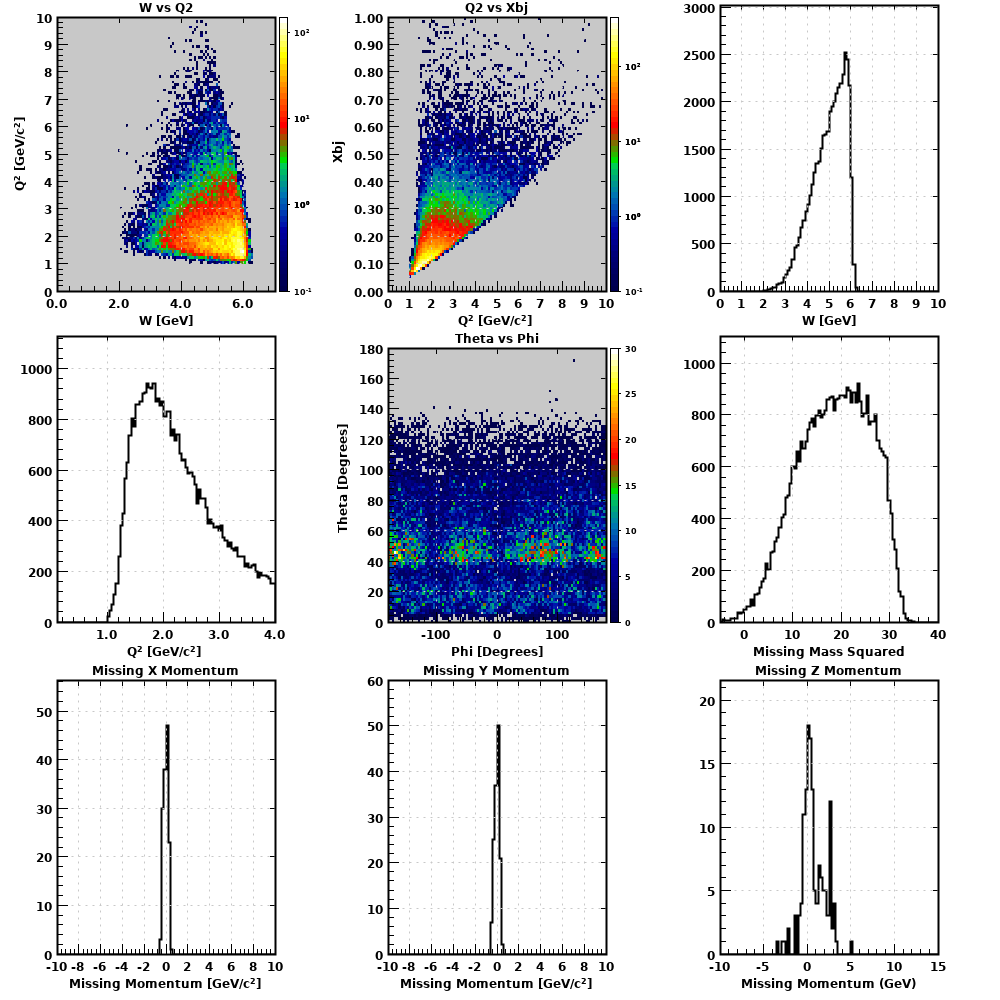

In [8]:

EmbeddedCanvas ec = new EmbeddedCanvas(1000,1000);
ec.divide(3,3);
ec.getPad(0).getAxisZ().setLog(true);
ec.cd(0).draw(WvsQ2);
ec.getPad(1).getAxisZ().setLog(true);
ec.cd(1).draw(Q2vsXbj);
ec.cd(2).draw(W);
ec.cd(3).draw(Q2);
ec.cd(4).draw(ThvsPhi);
ec.cd(5).draw(MMass);
ec.cd(6).draw(MMomx);
ec.cd(7).draw(MMomy);
ec.cd(8).draw(MMomz);

ec.getScreenShot();


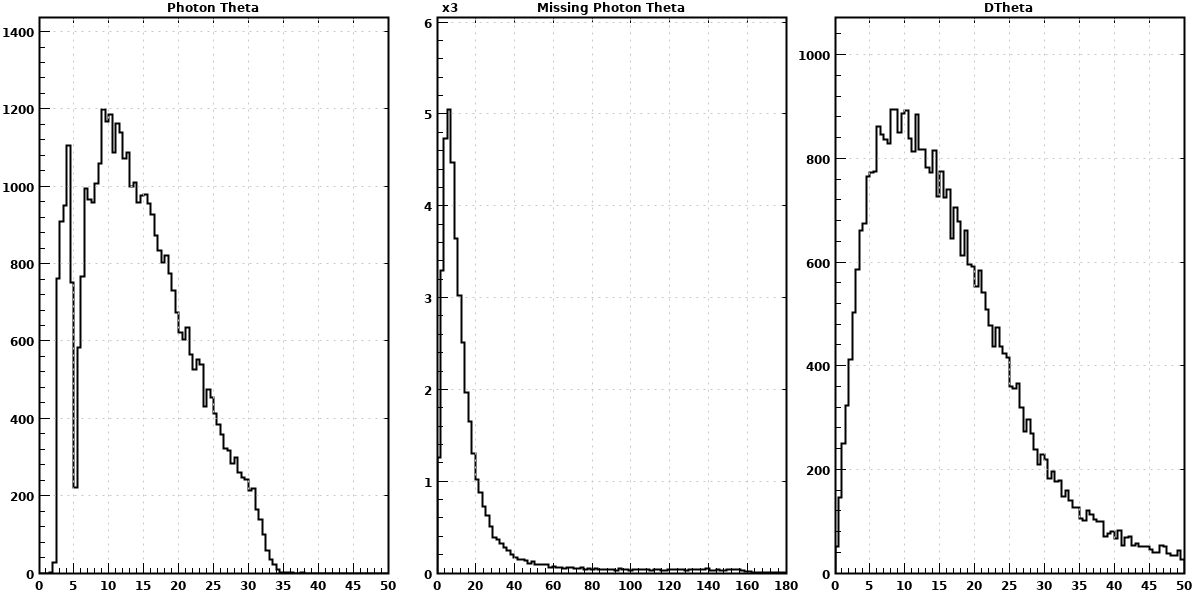

In [9]:
EmbeddedCanvas ec2 = new EmbeddedCanvas(1200,600);
ec2.divide(3,1);
ec2.cd(0).draw(ThetaHist);
ec2.cd(1).draw(MissThetaHist);
ec2.cd(2).draw(DThetaHist);
ec2.getScreenShot();

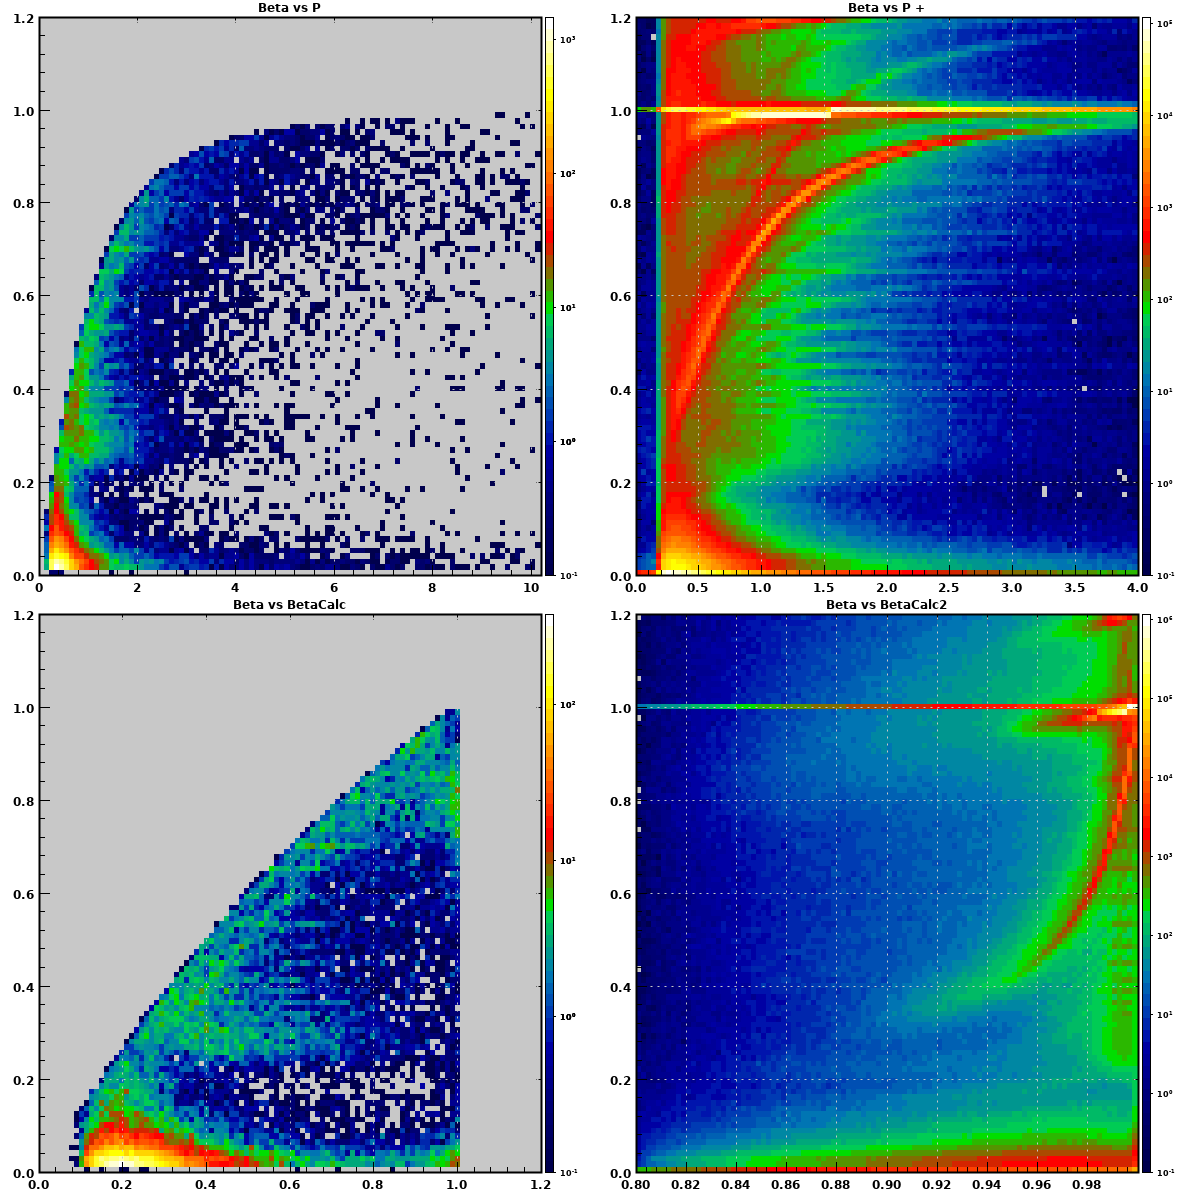

In [10]:
EmbeddedCanvas ec3 = new EmbeddedCanvas(1200,1200);
ec3.divide(2,2);
ec3.getPad(0).getAxisZ().setLog(true);
ec3.cd(0).draw(betavsP);
ec3.getPad(1).getAxisZ().setLog(true);
ec3.cd(1).draw(betavsPpositive);
ec3.getPad(2).getAxisZ().setLog(true);
ec3.cd(2).draw(betavsbetacalc);
ec3.getPad(3).getAxisZ().setLog(true);
ec3.cd(3).draw(betavsbetacalc2);
ec3.getScreenShot();


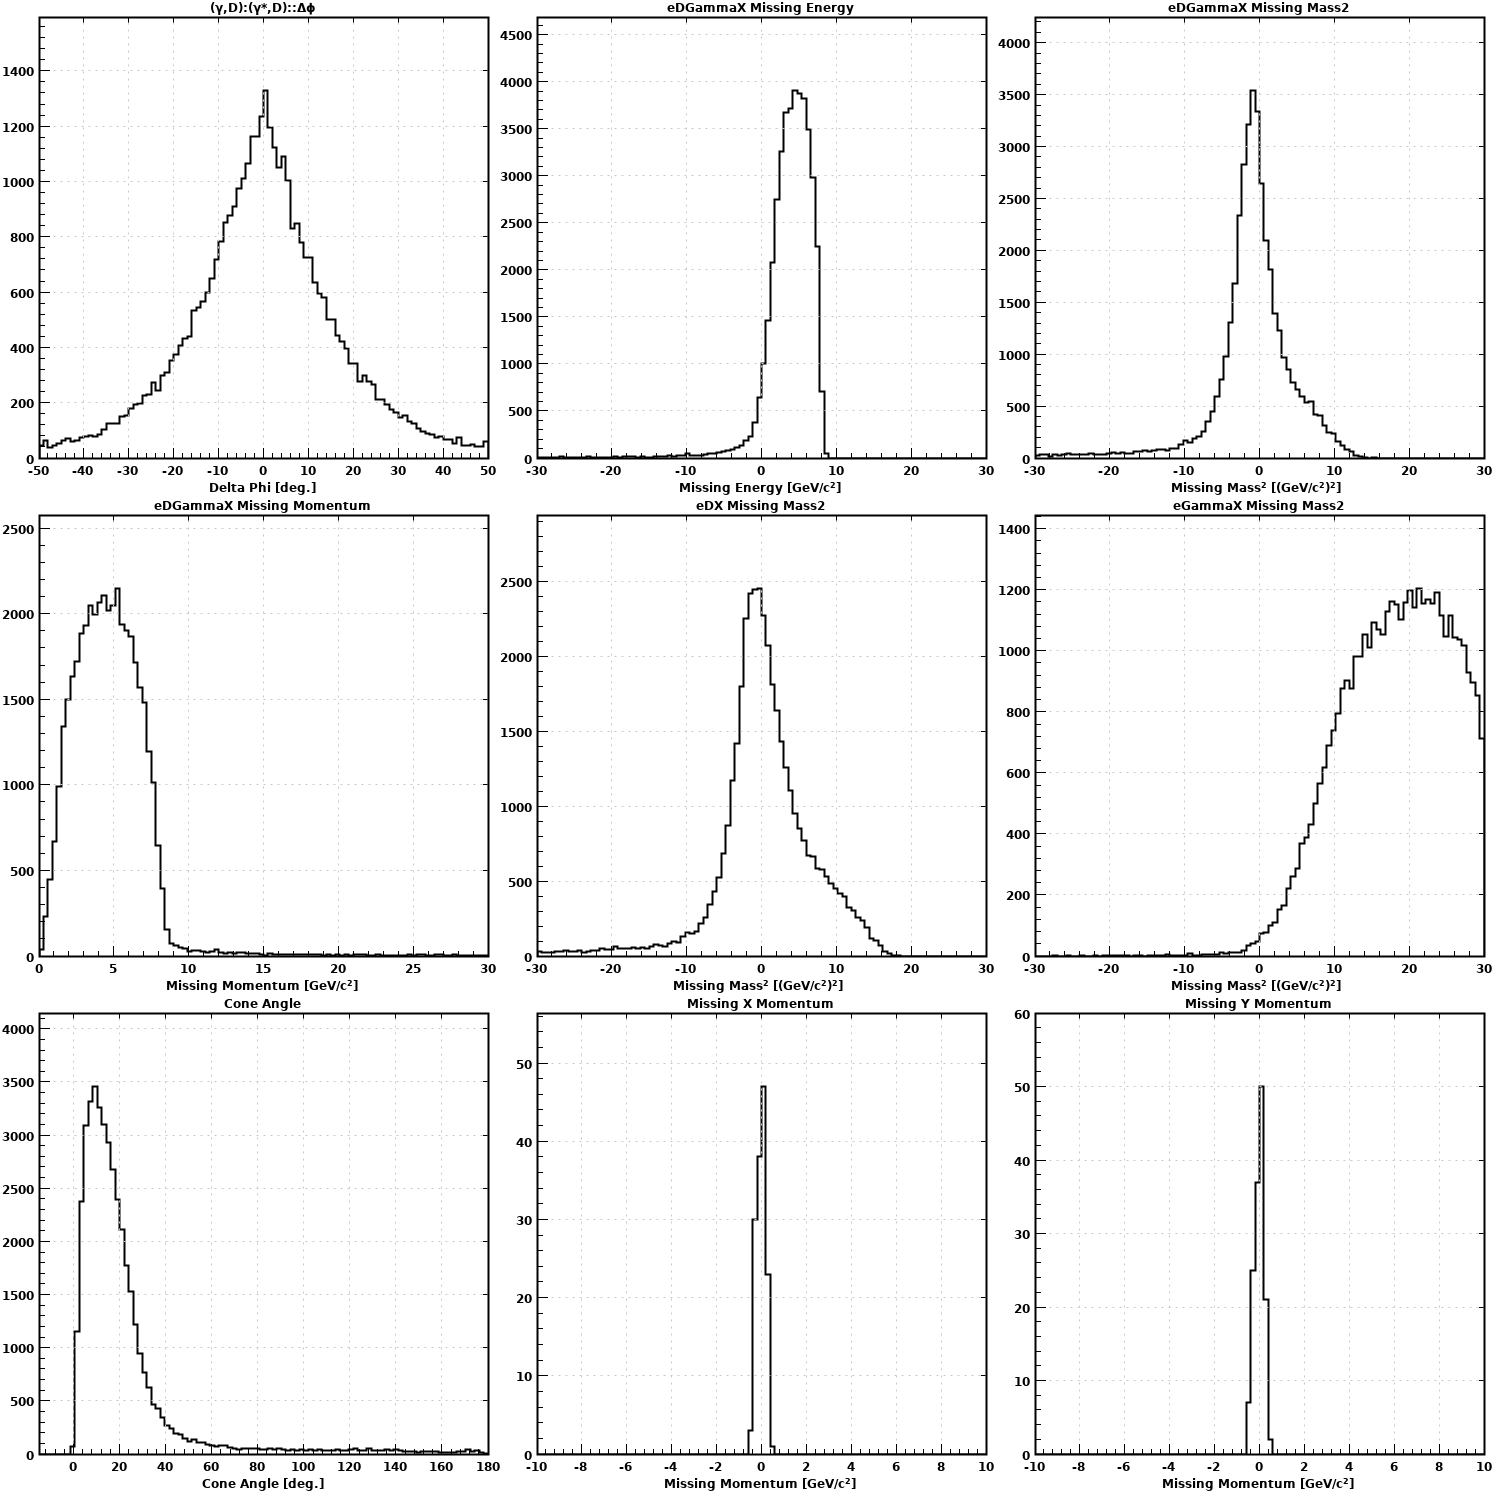

In [11]:
EmbeddedCanvas ec4 = new EmbeddedCanvas(1500,1500);
ec4.divide(3,3);
ec4.cd(0).draw(DeltaPhiPlaneHist);
ec4.cd(1).draw(edgXmissingE);
ec4.cd(2).draw(edgXmissingM2);
ec4.cd(3).draw(edgXmissingP);
ec4.cd(4).draw(edXmissingM2);
ec4.cd(5).draw(egXmissingM2);
ec4.cd(6).draw(ConeAngleHist);
ec4.cd(7).draw(MMomx);
ec4.cd(8).draw(MMomy);
ec4.getScreenShot();

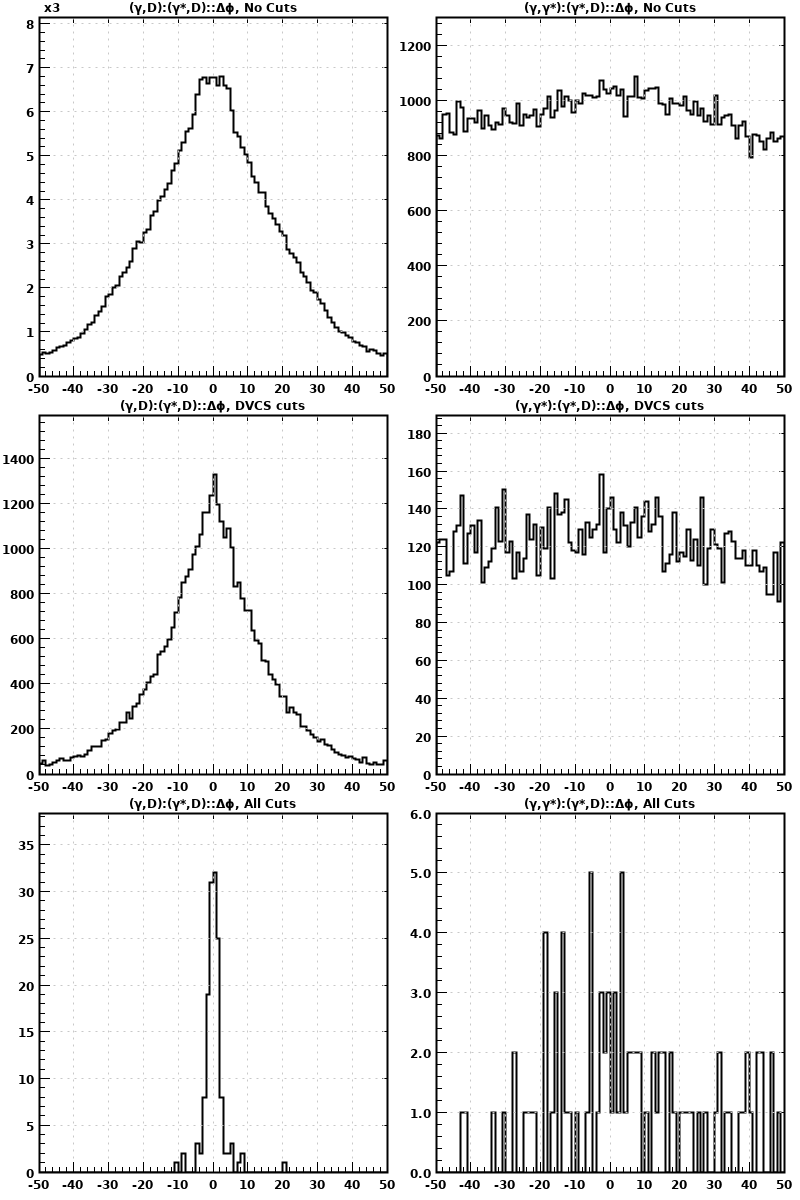

In [12]:
EmbeddedCanvas ec5 = new EmbeddedCanvas(800,1200);
ec5.divide(2,3);
ec5.cd(0).draw(DeltaPhiPlaneHistNC);
ec5.cd(1).draw(DeltaPhiPlaneMattHistNC);
ec5.cd(2).draw(DeltaPhiPlaneHistDC);
ec5.cd(3).draw(DeltaPhiPlaneMattHistDC);
ec5.cd(4).draw(DeltaPhiPlaneHistAC);
ec5.cd(5).draw(DeltaPhiPlaneMattHistAC);
ec5.getScreenShot();

In [13]:
EmbeddedCanvas ec6 = new EmbeddedCanvas(1200,1200);
ec6.divide(2,2);
ec6.cd(0).draw(coneanglevsedgXM2);
ec6.cd(1).draw(coneanglevsedXM2);
ec6.cd(2).draw(deltaphiplanevsedgXM2);
ec6.cd(3).draw(deltaphiplanevsedXM2);
//ec6.getScreenShot();
